#                                 Transaction fraud detection

- Financial fraud is criminal action with intent of obtaining financial gain. It is a growing threat in the finance industry.
- Credit card fraud rate grows together with the number of card transactions, which becomes the major mode of payment for both online and offline transaction.

- There can be inner or external card fraud. Inner fraud carried out via false identity to commit fraud while the external card fraud involves the use of stolen credit card to get cash or to pay for smth. 

- Most of the credit card fraud is external, when a thief tryes to pay with the stolen card.

- Financial institutions nowadays focuse on computational methodologies to handle credit card fraud problem.

Credit card companies are interested in identifying financial transactions that are illegitimate and criminal. A machine learning algorithm for fraud detection is trained by being fed the normal as well as fraud transaction data of lots and lots of cardholders. Transaction sequences are an example of this kind of training data. A person may typically pump gas one time a week, go grocery shopping every two weeks, and so on. The algorithm learns that this is a normal transaction sequence. Then the network predicts a probability for a test transaction to be fraudulent.


In case of credit card fraud detection, the model should be able to properly classify transactions as either legitimate or fraudulent, based on transaction data which includes for instance amount, merchant, location, time and others detailes of transaction.

In the dataset that contain transactions and their details, the majority of transactions is not fraudulent. That means we are dealing with imbalanced data.



https://medium.com/@curiousily/credit-card-fraud-detection-using-autoencoders-in-keras-tensorflow-for-hackers-part-vii-20e0c85301bd
https://medium.com/@marekgalovic/credit-card-fraud-detection-1a2f34a1d889
https://github.com/marekgalovic/articles/blob/master/credit_card_fraud/Credit%20card%20fraud.ipynb
https://medium.com/@jameschen_78678/how-can-we-detect-credit-card-fraud-729f18b6db10
https://towardsdatascience.com/fraud-detection-under-extreme-class-imbalance-c241854e60c
https://towardsdatascience.com/detecting-financial-fraud-using-machine-learning-three-ways-of-winning-the-war-against-imbalanced-a03f8815cce9
http://www.datajango.com/credit-card-fraud-detection-using-smote-classification-approach/
http://www.datajango.com/credit-card-fraud-detection-using-smote-classification-approach/

In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from copy import deepcopy
from collections import Counter
%matplotlib inline
seaborn.set(style='whitegrid', palette='muted', font_scale=1.5)
from matplotlib import rcParams
rcParams['figure.figsize'] = 8, 8
RANDOM_SEED = 0
LABELS = ["Legitimate", "Fraud"]

Using TensorFlow backend.


In [3]:
data = pd.read_csv("creditcard.csv")

In [4]:
data.shape

(284807, 31)

In [5]:
data.isnull().values.any()

False

In [6]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...         V21       V22       V23       V24  \
0  0.098698  0.363787  ...   -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425  ...   -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  ...    0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024  ...   -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  ...   -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1  0.167170  0.125895 -0.008983  0.014724    2.69      0  
2 -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3  0.647376 -0.221929  0.062723  0.061458  123.50      0  
4 -0.206010  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [7]:
data.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

           ...                 V21           V22           V23           V24  \
count      ...        2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean       ...        1.537294e-16  7.959909e-16  5.367590e-16  4.458112e-15   
std        ...        7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min        ...       -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%        ...       -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%        ...       -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%        ...        1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max        ...        2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.453003e-15  1.699104e-15 -3.660161e-16 -1.206049e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

The dataset contains transactions made by European cardholders back in September 2013. These are 2 days transactions, and there are 492 fraudulent out of 284,807 transactions. That means the dataset is highly imbalanced. The frauds are just 0.172% of all the transactions.
Saying that, if we predict these 492 fraudulent as “not fraud”, we’d get a 99.83% classification accuracy for our model. Quite high! But our model will be wrong as it cannnot do what we need - identify frauds.

In [8]:
classes = pd.value_counts(data['Class'], sort = True)
classes

0    284315
1       492
Name: Class, dtype: int64

In [9]:
def percent(part, whole):
  return 100 * float(part)/float(whole)
perc_fraud = percent(classes[0], classes[1]+classes[0])
perc_legit = percent(classes[1], classes[1]+classes[0])
print(perc_fraud, perc_legit)

99.827251436938 0.1727485630620034


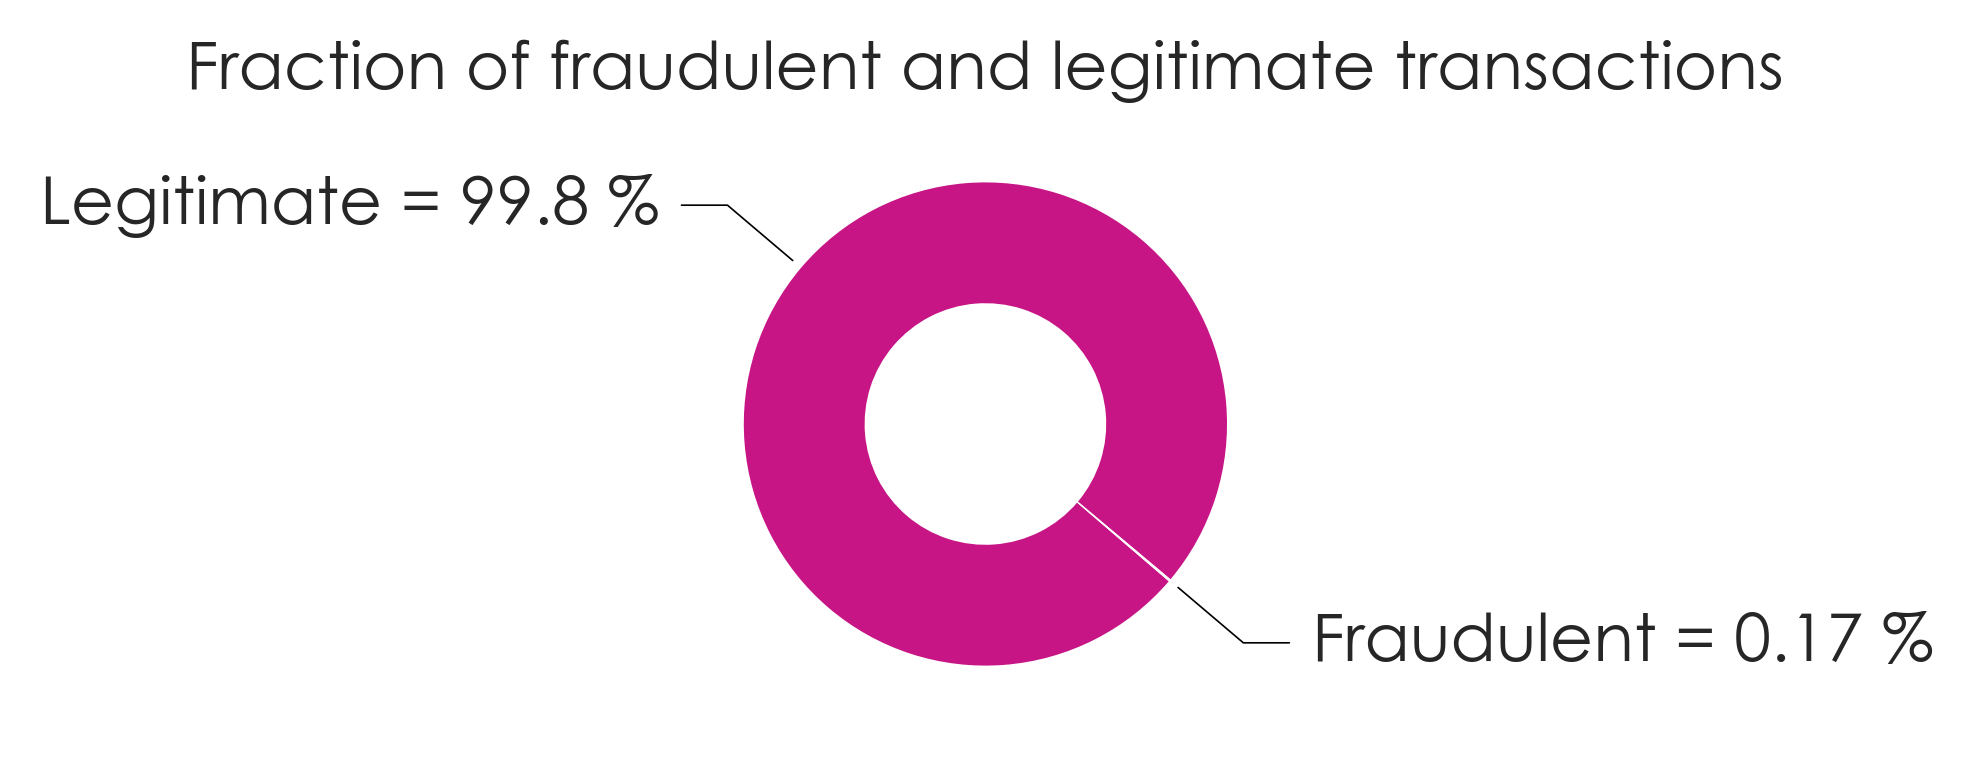

In [11]:
rcParams['figure.figsize'] = 2, 2
labels = ["Legitimate = 99.8 %", "Fraudulent = 0.17 %"]

rcParams['axes.titlesize'] = 12
rcParams['font.size'] = 12
rcParams['figure.dpi']= 400
rcParams["font.family"] = "Century Gothic"
fig, ax = plt.subplots(figsize=(2, 2), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(classes, wedgeprops=dict(width=0.5), startangle=-40, colors=['mediumvioletred', 'white'])
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          #bbox=bbox_props, #add box 
          zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)
#rcParams['axes.titlesize'] = 12
#rcParams['font.size'] = 12
ax.set_title("Fraction of fraudulent and legitimate transactions")

plt.show()

In [12]:
frauds = data[data.Class == 1]
legit = data[data.Class == 0]
frauds.shape

(492, 31)

In [13]:
legit.shape

(284315, 31)

In [14]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

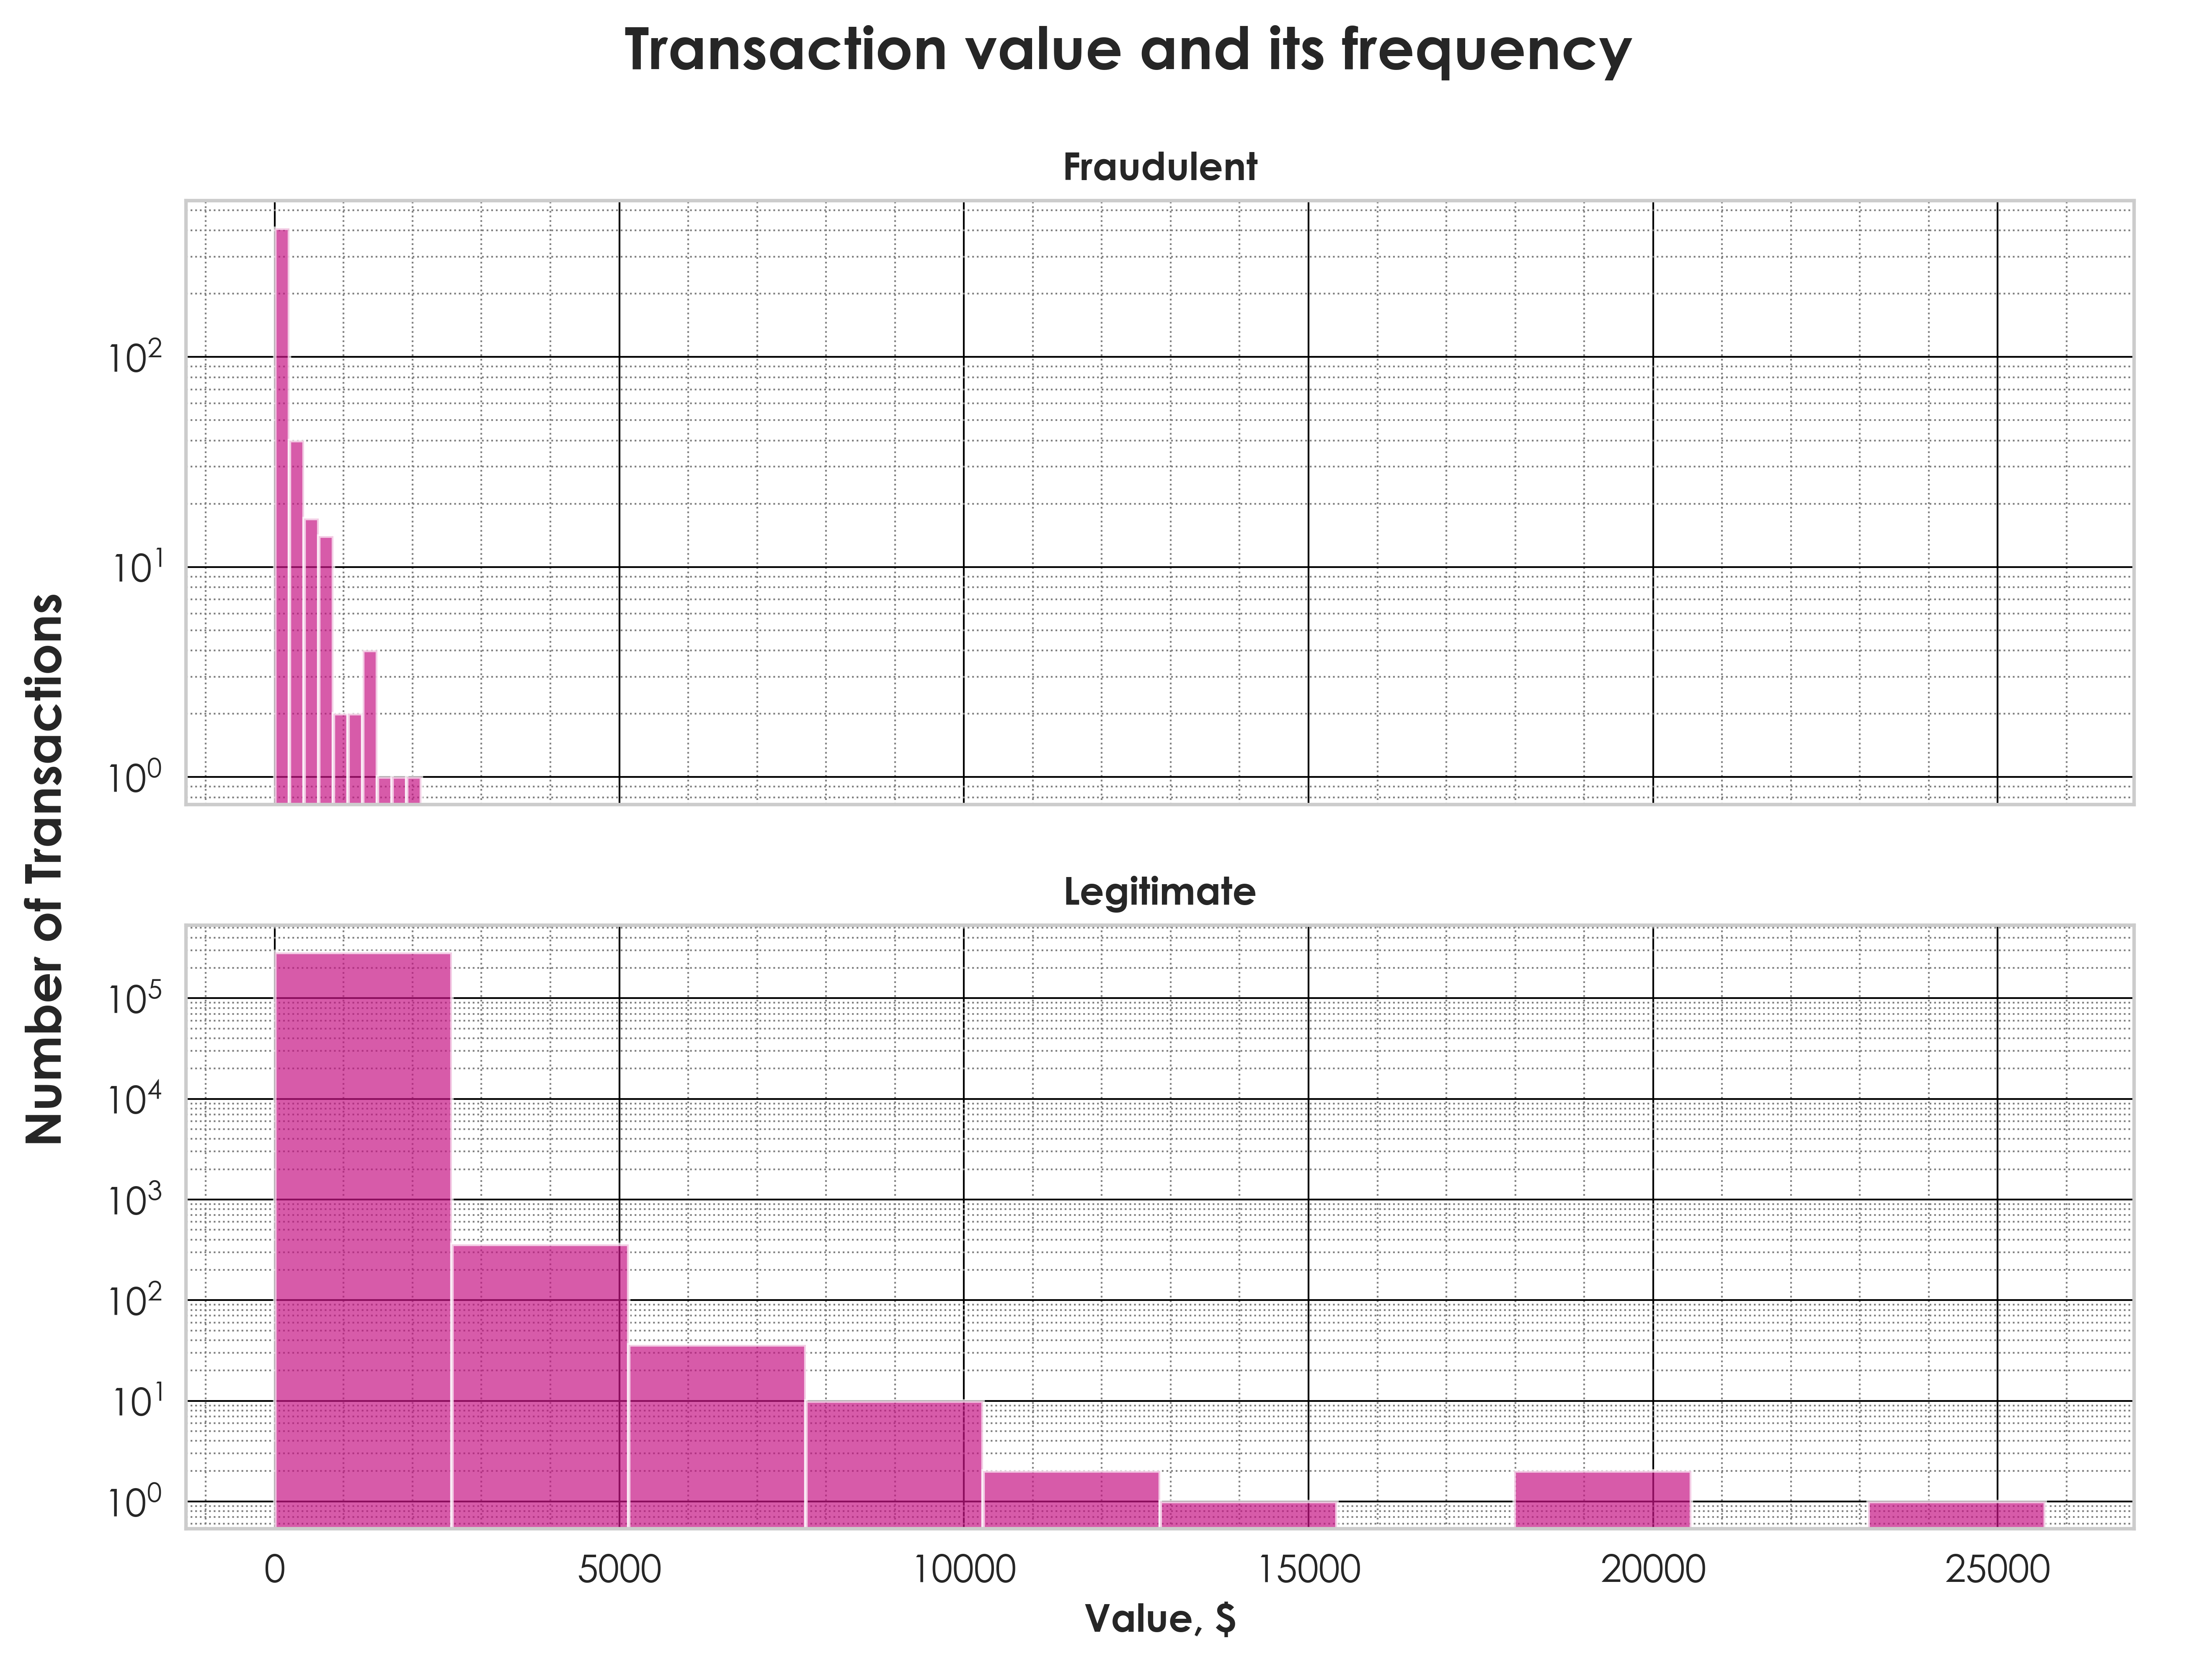

In [17]:
rcParams['figure.figsize'] = 10, 7
rcParams['font.size'] = 14
rcParams['axes.titlesize'] = 11
#rcParams["font.family"] = "Arial"
#csfont = {'fontname':'Times New Roman'}
#plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=11)
rcParams['figure.dpi']= 300
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.add_subplot(111, frameon=False)
f.suptitle('Transaction value and its frequency', fontweight='bold')

bins = 30

ax1.hist(frauds.Amount, alpha = 0.7, color='mediumvioletred', edgecolor='white', linewidth=1)
ax1.set_title('Fraudulent', fontweight='bold')
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax1.set_yscale('log', nonposy='clip')

ax2.hist(legit.Amount, alpha = 0.7, color='mediumvioletred', edgecolor='white', linewidth=1)
ax2.set_title('Legitimate', fontweight='bold')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax2.set_yscale('log', nonposy='clip')

plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Value, $', fontweight='bold')

#plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
#plt.yscale('log', nonposy='clip')
f.text(0.07, 0.5, 'Number of Transactions', ha='center', va='center', rotation='vertical', fontweight='bold')
plt.show()
#.savefig("something.png",dpi=300)

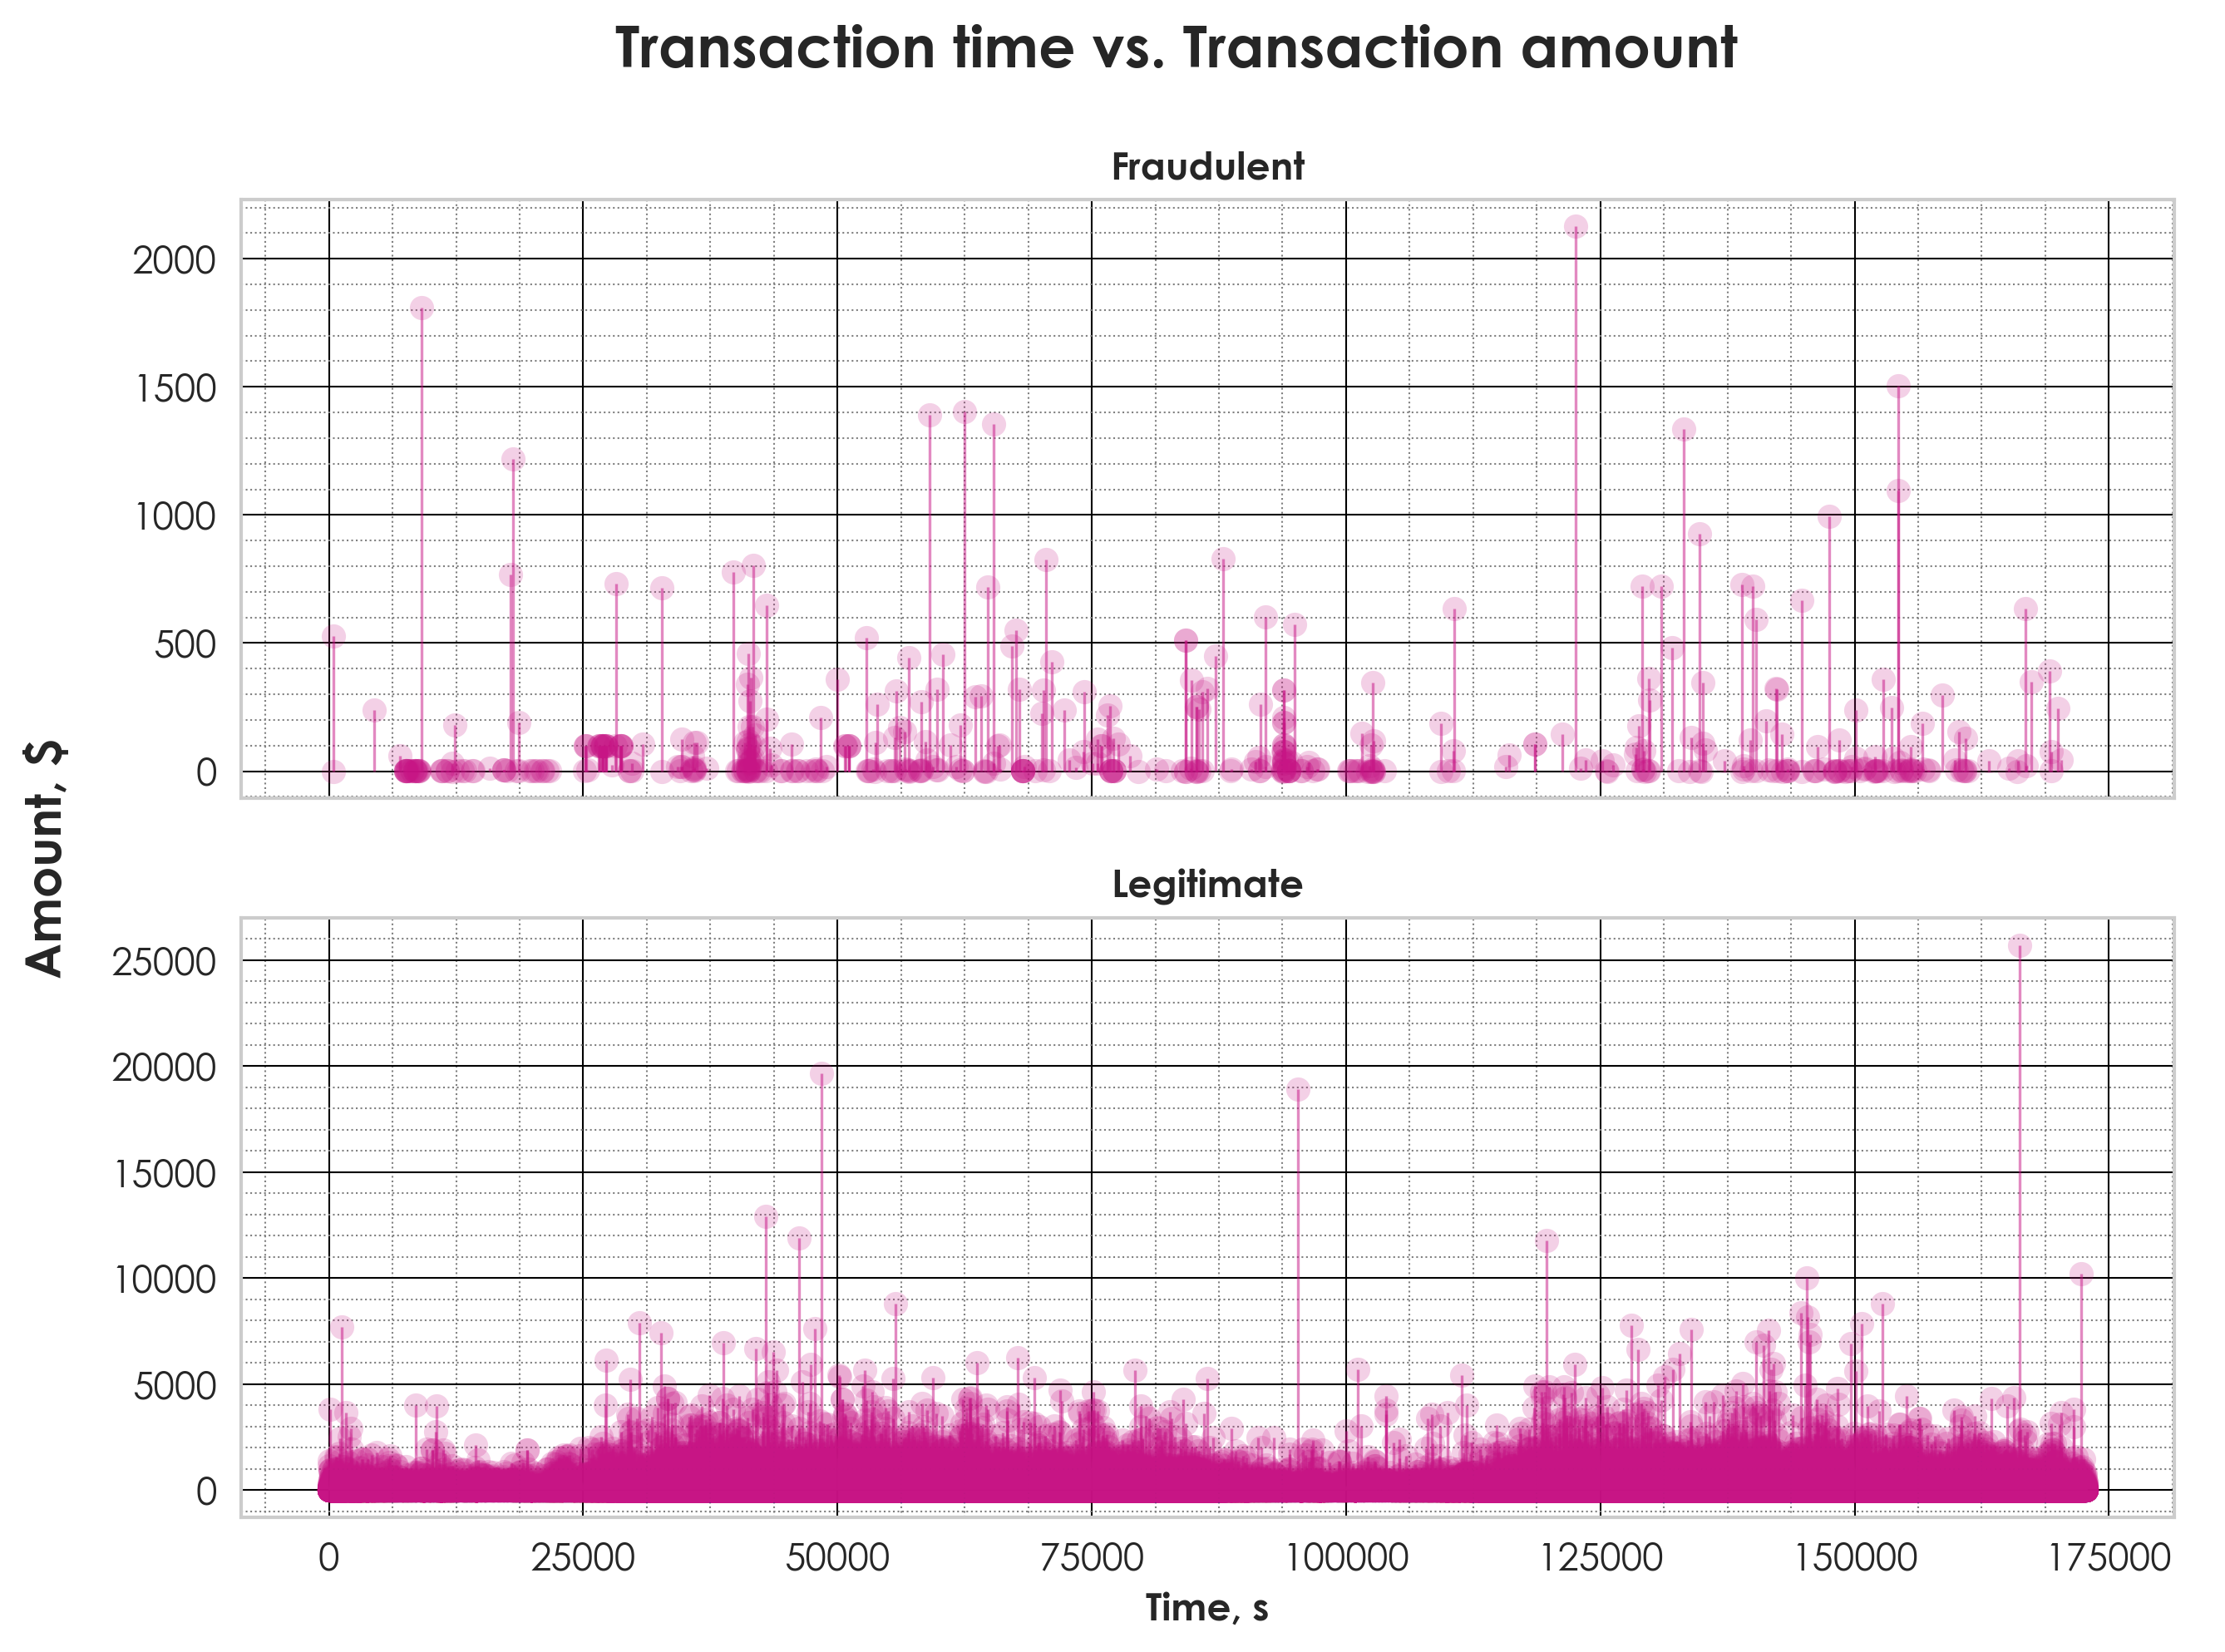

In [20]:
rcParams['figure.figsize'] = 10, 7
rcParams['axes.titlesize'] = 11
rcParams['font.size'] = 14
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('axes', labelsize=11)
rcParams['figure.dpi']= 300
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.add_subplot(111, frameon=False)
f.suptitle('Transaction time vs. Transaction amount', fontweight='bold')

ax1.vlines(frauds.Time, ymin=0, ymax=frauds.Amount, color='mediumvioletred', alpha = 0.5, lw=0.8)
ax1.plot(frauds.Time, frauds.Amount, "o", color='mediumvioletred', alpha = 0.2)
ax1.minorticks_on()
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
ax1.set_title('Fraudulent', fontweight='bold')

ax2.vlines(legit.Time, ymin=0, ymax=legit.Amount, color='mediumvioletred', alpha = 0.5, lw=0.8)
ax2.plot(legit.Time, legit.Amount, "o", color='mediumvioletred', alpha = 0.2)
ax2.set_title('Legitimate', fontweight='bold')
ax2.minorticks_on()
ax2.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel('Time, s', fontweight='bold')
#plt.ylabel('Amount')
plt.text(-0.1, 0.5, 'Amount, $', ha='center', va='center', rotation='vertical', fontweight='bold')
plt.show()


The type of transaction doesn't realy show any dependency from the time of transaction. Therefore the time feature can be excluded from our prediction model. 

The table with statistical overview shows that values of the column "Amount" differ from other features values by several orders of magnitude. In the next step we'll rescale it so it has mean 0 and standard deviation 1.

In [22]:
from sklearn.preprocessing import StandardScaler
data_copy = deepcopy(data)
scaler = StandardScaler()
data_copy['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data_copy.drop('Time', axis=1, inplace=True)

feature_columns = data_copy.columns.values.tolist()
feature_columns.remove('Class')
target = 'Class'

X = data_copy[feature_columns]
y = data_copy[target]

In [23]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(data_copy[feature_columns], data_copy[target], test_size=0.3, random_state=0)
print('% fraud in population: ', data_copy[data_copy[target] == 1].shape[0] / data_copy.shape[0] * 100)
print('Train - size:', train_y.shape[0], ', %fraud:', train_y[train_y == 1].shape[0] / train_y.shape[0] * 100)
print('Test - size:', test_y.shape[0], ', %fraud: ', test_y[test_y == 1].shape[0] / test_y.shape[0] * 100)

% fraud in population:  0.1727485630620034
Train - size: 199364 , %fraud: 0.17305029995385326
Test - size: 85443 , %fraud:  0.17204452090867595


In [24]:
from sklearn import metrics

def model_metrics(model, test_X, test_y, rf=False):
  
    
    
    rcParams["font.family"] = "Century Gothic"
    rcParams['figure.dpi']= 600
    rcParams['axes.titlesize'] = 16
    rcParams['font.size'] = 16
    plt.rc('xtick', labelsize=16)
    plt.rc('ytick', labelsize=16)
    plt.rc('axes', labelsize=16)
    predictions = model.predict(test_X) 
    cmap = seaborn.cubehelix_palette(8, as_cmap=True)
    
    print(metrics.classification_report(test_y, predictions))
    
    plt.figure(figsize=(21, 4))
    plt.subplot(131)
    conf_mat = metrics.confusion_matrix(test_y, predictions)
    cm_sum = np.sum(conf_mat, axis=1, keepdims=True)
    cm_perc = conf_mat / cm_sum.astype(float) * 100
    annot = np.empty_like(conf_mat).astype(str)
    nrows, ncols = conf_mat.shape
    for i in range(nrows):
        for j in range(ncols):
            c = conf_mat[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(conf_mat)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    ax = seaborn.heatmap(cm, annot=annot, fmt='', cmap=cmap)
    #ax.set_xlabel('Predicted')
    #ax.set_ylabel('Actual')

    if rf:
        return
    #probabilities = model.predict_proba(test_X)
    probabilities = model.decision_function(test_X)
    fp_rate, tp_rate, _ = metrics.roc_curve(test_y, probabilities)
    auc = metrics.auc(fp_rate, tp_rate)

    plt.subplot(132)
    plt.plot(fp_rate, tp_rate, color='mediumvioletred', label='AUC: %.3f' % auc)
    plt.plot([0, 1], [0, 1], color='mediumvioletred', linestyle='--')
    plt.xlabel('FP rate')
    plt.ylabel('TP rate')
    plt.legend(loc='lower right')
    
    if not rf: 
        precision, recall, _ = metrics.precision_recall_curve(test_y, probabilities)
        avg_precision = metrics.average_precision_score(test_y, probabilities)
        plt.subplot(133)
        plt.plot(precision, recall, label="AUC: %.3f" % avg_precision, color='mediumvioletred')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower left')
    
    plt.show()

# Baseline: logistic regression

We first train logistic regression classifier with the default parameters and later use the result as a baseline score to compare other models with. 
As it is seen, the model already learns very well about the legit transactions, but is unable to recognize the fraudelent ones. 

/home/elementique/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     85296
          1       0.88      0.62      0.73       147

avg / total       1.00      1.00      1.00     85443



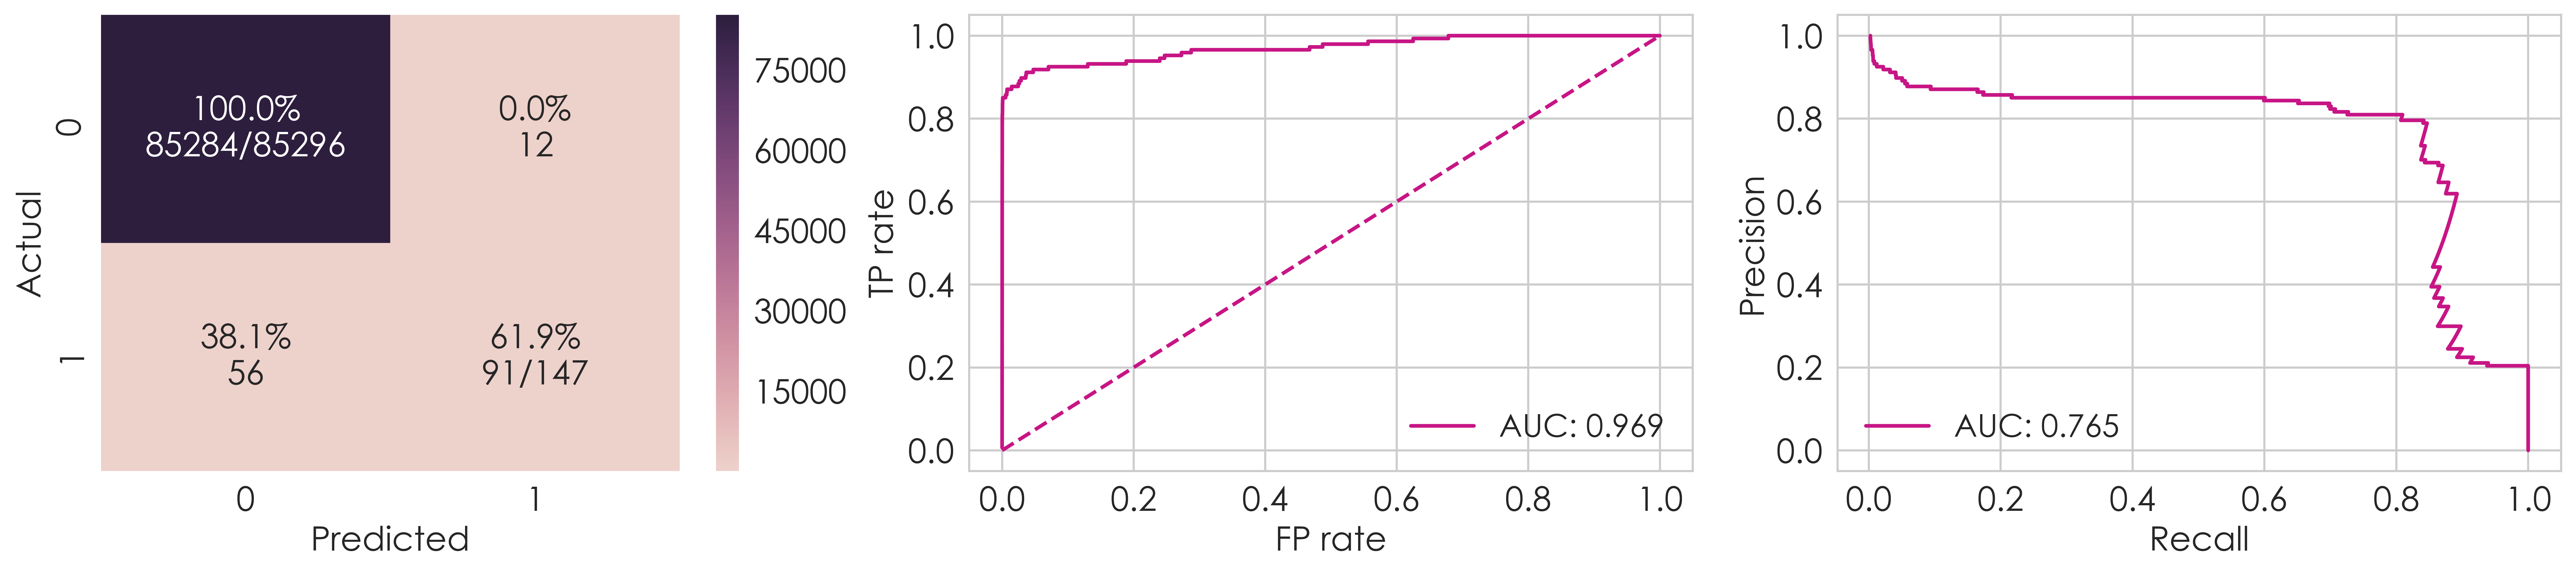

In [25]:
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(n_jobs=4)
lr_model.fit(train_X, train_y)

model_metrics(lr_model, test_X, test_y)

# Overcome the data imbalance 1: weighted loss function

Applying weighted loss function can help to overcome the high data imbalance. In this case, the gradient updates are adjusted inversely proportional to the class frequency, i.e. the updates of the larger class are supressed and the updates of smaller class are prioritized.
As the result, the recall score for prediction of fraudulent ones increased from 58% to 89% and the precision decreased.

             precision    recall  f1-score   support

          0       1.00      0.98      0.99     85296
          1       0.06      0.91      0.12       147

avg / total       1.00      0.98      0.99     85443



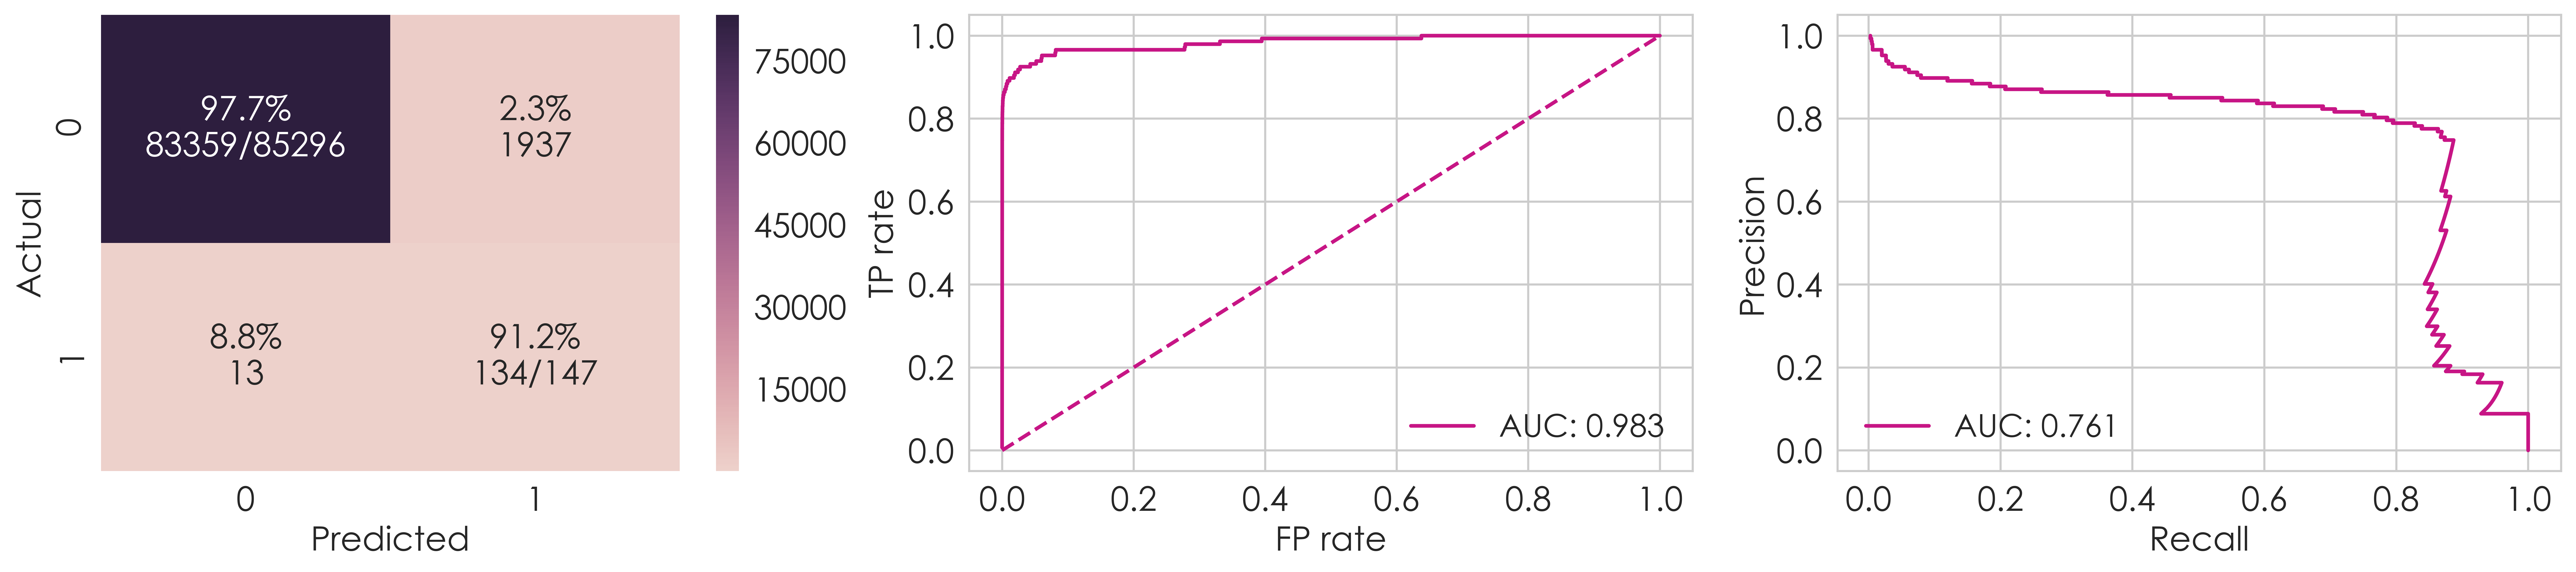

In [20]:
lr_model = LogisticRegression(class_weight='balanced', n_jobs=1)
lr_model.fit(train_X, train_y)

model_metrics(lr_model, test_X, test_y)

# Overcome the data imbalance 2: over- and undersampling

Another technique to overcome class imbalance is to undersample the larger class or oversample the smaller class. 
Undersampling basically means that the most of the legitimate transactions will be removed from the data so that there is approximately the same amount of both classes in the training and testing data. The disadvantage of undersampling is that a great amount of information is being removed from the majority class. 

In [26]:
import numpy as np

def undersample(data, n=1):
    positive_samples = data_copy[data_copy[target] == 1].copy().apply(np.random.permutation)
    negative_samples = data_copy[data_copy[target] == 0].copy().apply(np.random.permutation).head(positive_samples.shape[0] * n)

    undersampled_data = pd.concat([positive_samples, negative_samples])

    u_train_X, u_test_X, u_train_y, u_test_y = train_test_split(undersampled_data[feature_columns], undersampled_data[target], test_size=0.3)
    print('% fraud in population: ', undersampled_data[undersampled_data[target] == 1].shape[0] / undersampled_data.shape[0] * 100)
    print('Train - size:', u_train_y.shape[0], ', %fraud:', u_train_y[u_train_y == 1].shape[0] / u_train_y.shape[0] * 100)
    print('Test - size:', u_test_y.shape[0], ', %fraud: ', u_test_y[u_test_y == 1].shape[0] / u_test_y.shape[0] * 100)
    
    return u_train_X, u_test_X, u_train_y, u_test_y

u_train_X, u_test_X, u_train_y, u_test_y = undersample(data, 1)

% fraud in population:  50.0
Train - size: 688 , %fraud: 49.56395348837209
Test - size: 296 , %fraud:  51.01351351351351


             precision    recall  f1-score   support

          0       1.00      0.56      0.72       145
          1       0.70      1.00      0.83       151

avg / total       0.85      0.78      0.77       296



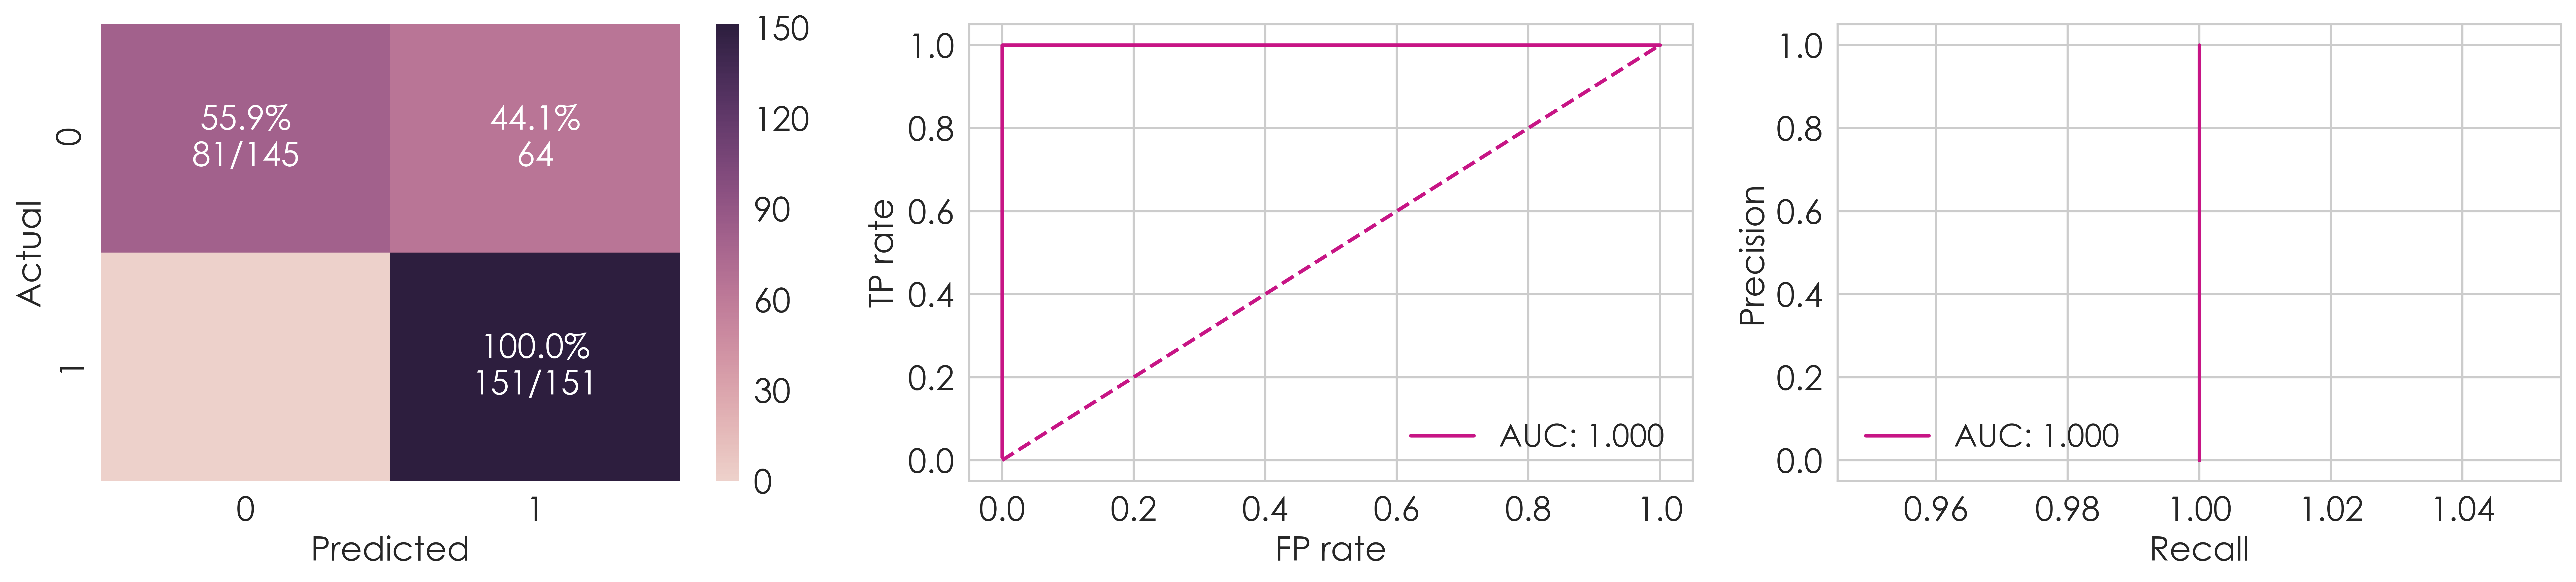

             precision    recall  f1-score   support

          0       1.00      0.74      0.85     85296
          1       0.01      0.97      0.01       147

avg / total       1.00      0.74      0.85     85443



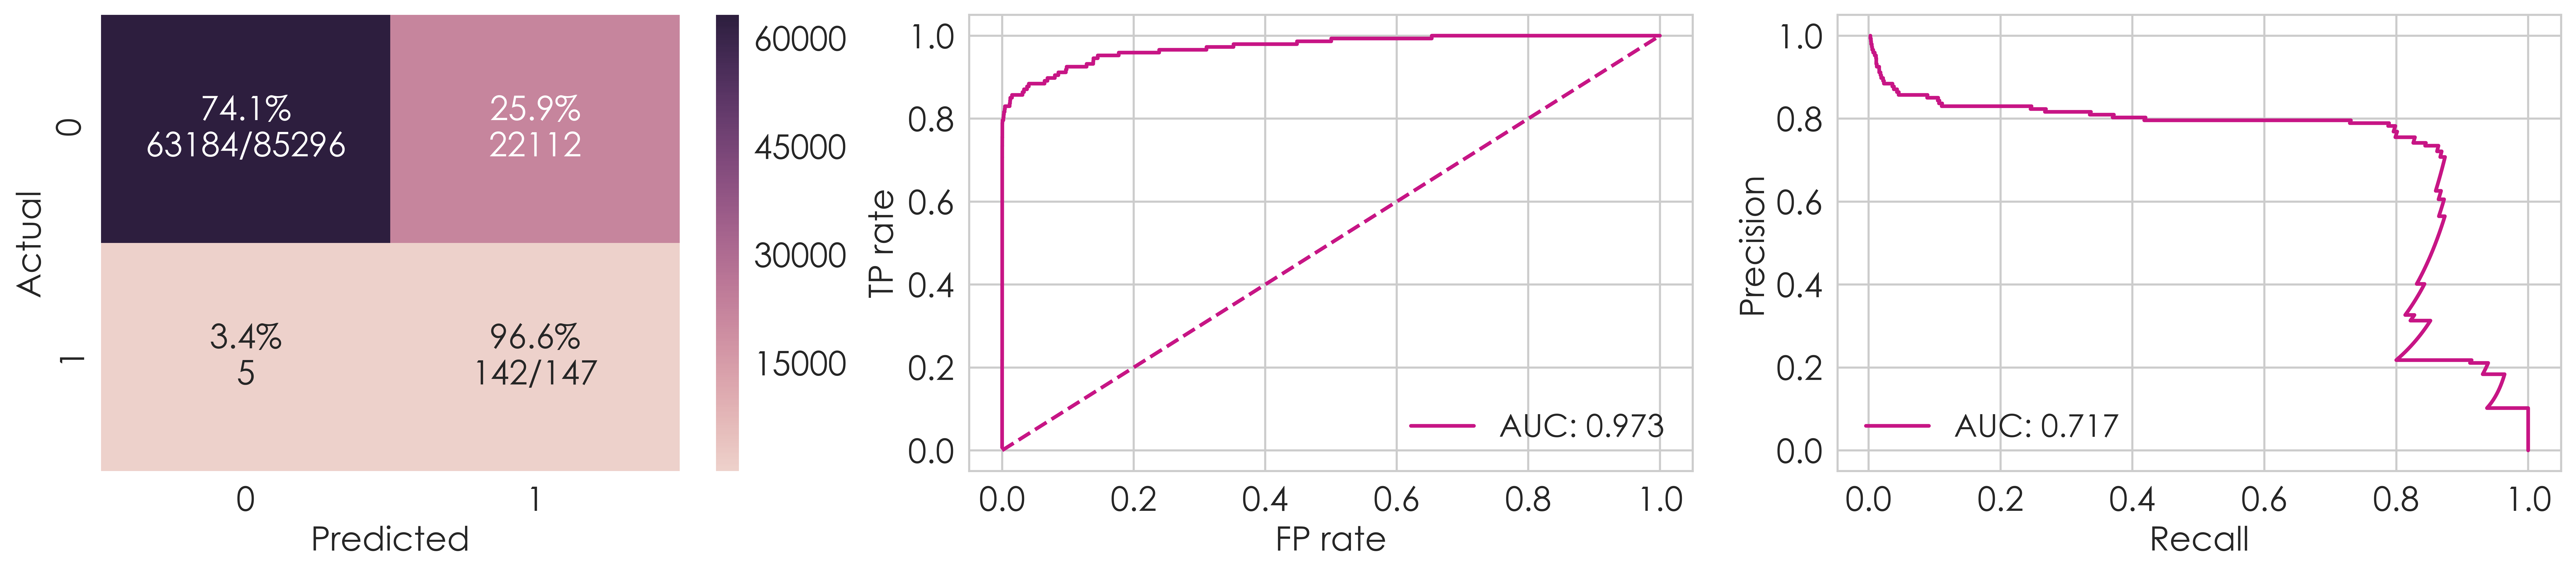

In [27]:
u_lr_model = LogisticRegression(C=0.0001, n_jobs=1)
u_lr_model.fit(u_train_X, u_train_y)

model_metrics(u_lr_model, u_test_X, u_test_y)
model_metrics(u_lr_model, test_X, test_y)

Model trained on the undersampled data has shown recall equal to 1. However, the evaluation of the model on real world data, or on the original test data, shows droping of both recall and precision. Due to loss of information induced by undersampling, the model is not realy able to make good predictions on real world data. 

# Overcome the data imbalance 3: SMOTE

Another technique to overcome the data imbalance is SMOTE — Synthetic Minority Over-sampling Technique. SMOTE creates synthetic observations of the minority class (in this case, fraudulent transactions). The technique first finds the k-nearest-neighbors for minority class observations, then randomly chooses one of the k-nearest-neighbors and creates a similar, but randomly tweaked, new observations. To implement SMOTE, we will use imblearn library. It is a toolbox for dealing with imbalanced data problems.

In [30]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(ratio='auto',kind='regular', random_state=0)

In [50]:
def plot_metrics(data_x, data_y):
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, classification_report, confusion_matrix
    from sklearn.model_selection import KFold
    from sklearn.model_selection import StratifiedShuffleSplit
    from imblearn.pipeline import make_pipeline
    from sklearn.model_selection import StratifiedShuffleSplit
    cmap = seaborn.cubehelix_palette(8, as_cmap=True)  


    stratified = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    classifier = LogisticRegression(C=0.0002, n_jobs=1, random_state = 0)
    #kf = KFold(n_splits=5, random_state=0)
    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc_auc = []
    tn = []
    fp = []
    fn = []
    tp = []
    probabilities = []
    cm_av = np.array([[0, 0], [0, 0]])

    for train_index, test_index in stratified.split(data_x, data_y):


        X_train, X_test = data_x.iloc[train_index], data_x.iloc[test_index]
        y_train, y_test = data_y[train_index], data_y[test_index]



        pipeline = make_pipeline(smote, classifier)
        model = pipeline.fit(X_train, y_train)
        prediction = model.predict(X_test)

        accuracy.append(pipeline.score(X_test, y_test))
        precision.append(precision_score(y_test, prediction))
        recall.append(recall_score(y_test, prediction))
        f1.append(f1_score(y_test, prediction))
        roc_auc.append(roc_auc_score(y_test, prediction))
        conf_mat = confusion_matrix(y_test, prediction)
        tn.append(conf_mat[0][0])
        fp.append(conf_mat[0][1])
        fn.append(conf_mat[1][0])
        tp.append(conf_mat[1][1])
        probabilities.append(model.decision_function(X_test))



    plt.figure(figsize=(21, 4))
    plt.subplot(131)    
    prob = np.mean(probabilities, axis=0)  
    cm_av[0][0] = np.mean(tn)
    cm_av[0][1] = np.mean(fp)
    cm_av[1][0] = np.mean(fn)
    cm_av[1][1] = np.mean(tp)
    cm_sum = np.sum(cm_av, axis=1, keepdims=True)
    cm_perc = cm_av / cm_sum.astype(float) * 100
    annot = np.empty_like(cm_av).astype(str)
    nrows, ncols = cm_av.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm_av[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm_av)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    ax = seaborn.heatmap(cm, annot=annot, fmt='', cmap=cmap)


    fp_rate, tp_rate, _ = metrics.roc_curve(y_test, prob)
    auc = metrics.auc(fp_rate, tp_rate)

    plt.subplot(132)
    plt.plot(fp_rate, tp_rate, color='mediumvioletred', label='AUC: %.3f' % auc)
    plt.plot([0, 1], [0, 1], color='mediumvioletred', linestyle='--')
    plt.xlabel('FP rate')
    plt.ylabel('TP rate')
    plt.legend(loc='lower right')

    rf = False
    if not rf: 
        precision, recall, _ = metrics.precision_recall_curve(y_test, prob)
        avg_precision = metrics.average_precision_score(y_test, prob)
        plt.subplot(133)
        plt.plot(precision, recall, label="AUC: %.3f" % avg_precision, color='mediumvioletred')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc='lower right')




    print()
    #Percentage of fraudlent records in original data
    smote_x, smote_y = smote.fit_sample(X_train, y_train)
    Source_data_no_fraud_count = len(data_y[data_y==0])
    Source_data_fraud_count = len(data_y[data_y==1])
    print('Percentage of fraud counts in original training set: {}%'.format((Source_data_fraud_count*100)/(Source_data_no_fraud_count+Source_data_fraud_count)))

    #Percentage of fraudlent records in sampled data
    Sampled_data_no_fraud_count = len(smote_y[smote_y==0])
    Sampled_data_fraud_count = len(smote_y[smote_y==1])
    print('Percentage of fraud counts in the new training dataset: {}%'.format((Sampled_data_fraud_count*100)/(Sampled_data_no_fraud_count+Sampled_data_fraud_count)))

    print("Accuracy: {}".format(np.mean(accuracy)))
    print("Precision: {}".format(np.mean(precision)))
    print("Recall: {}".format(np.mean(recall)))
    print("ROC_AUC: {}".format(np.mean(roc_auc)))
    print("F1: {}".format(np.mean(f1)))



Percentage of fraud counts in original training set: 0.1727485630620034%
Percentage of fraud counts in the new training dataset: 50.0%
Accuracy: 0.9755158409700035
Precision: 0.009866679089573222
Recall: 0.9633374491833367
ROC_AUC: 0.9492899919674642
F1: 0.11599670430681641


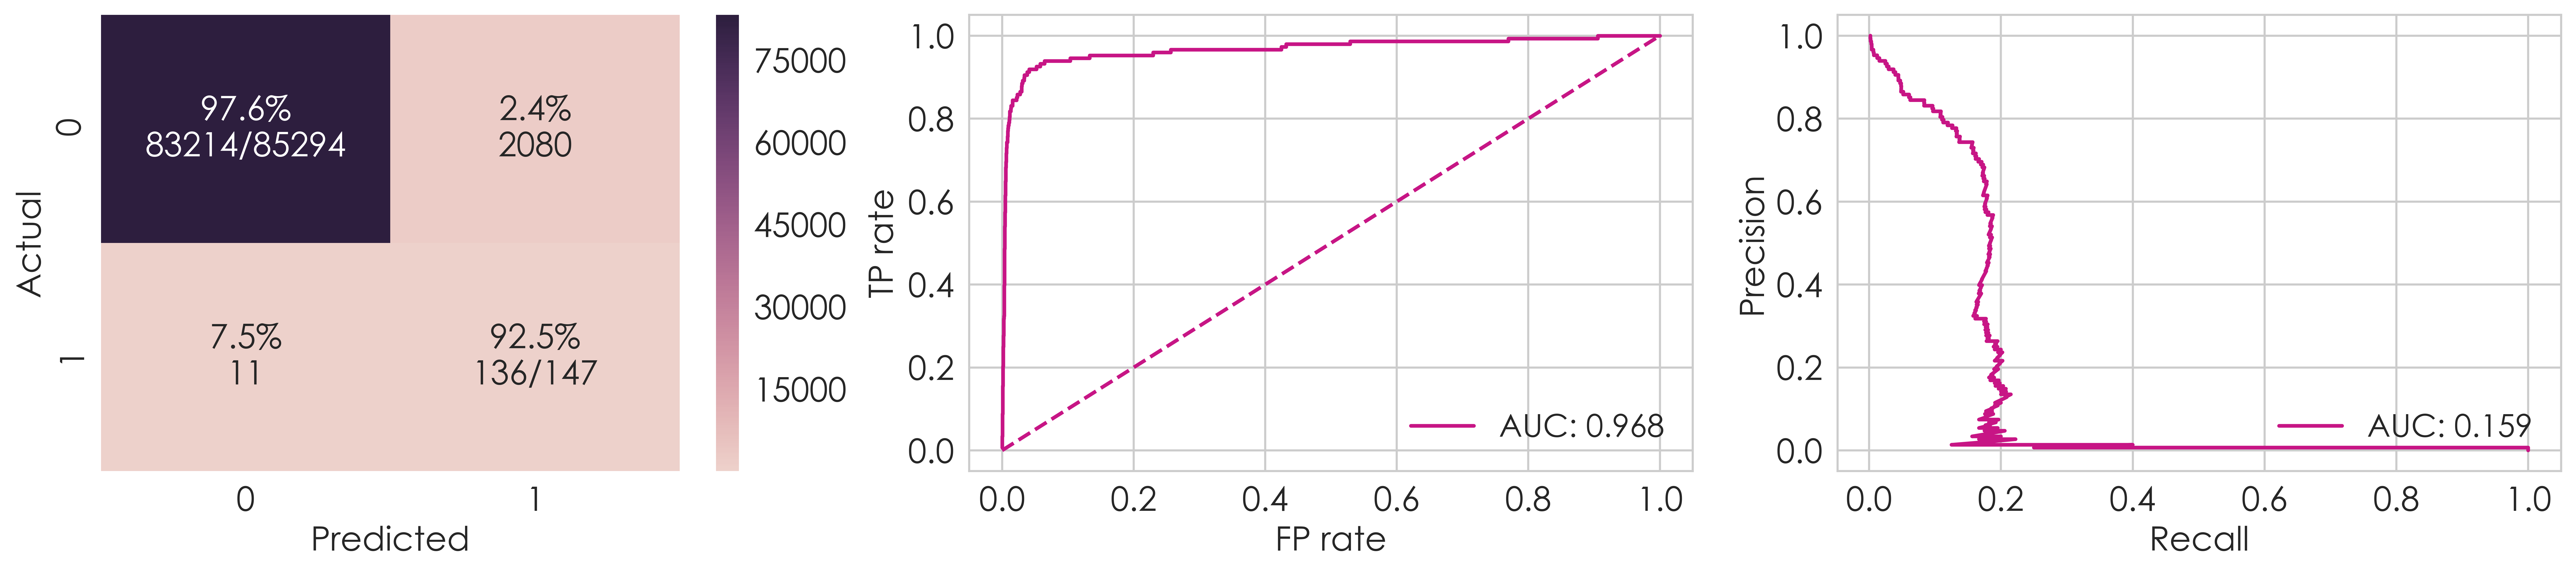

In [51]:
plot_metrics(data_copy[feature_columns], data_copy[target])

# Overcome the data imbalance 4: feature enginiering

Applying clustering, we can organize our features by groups, and the group will be then additional feature in our training dataset.

In [53]:
#Elbow Curve for identifying the best number of clusters 12
#from sklearn.cluster import KMeans
#sum_of_squared_distances = [] # Within Cluster Sum of Squares
#for k in range(1, 30):
     #kmeans = KMeans(n_clusters = k, random_state = 0)
     #kmeans.fit(train_X)
     #sum_of_squared_distances.append(kmeans.inertia_)


In [54]:
#rcParams['figure.figsize'] = 10, 8
#plt.plot(range(1, 30), sum_of_squared_distances, '--')
#plt.title('Determining the optimal number of clusters with the Elbow Method')
#plt.xlabel('Number of clusters k')
#plt.ylabel('Sum_of_squared_distances')
#plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans_best = KMeans(n_clusters = 11, init = 'k-means++', random_state = 0)
clusters = kmeans_best.fit_predict(X)


In [36]:
X.head()
X_new = deepcopy(X)

In [37]:
X_new['new_feature'] = clusters

In [38]:
X_new.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10     ...            V21       V22       V23  \
0  0.098698  0.363787  0.090794     ...      -0.018307  0.277838 -0.110474   
1  0.085102 -0.255425 -0.166974     ...      -0.225775 -0.638672  0.101288   
2  0.247676 -1.514654  0.207643     ...       0.247998  0.771679  0.909412   
3  0.377436 -1.387024 -0.054952     ...      -0.108300  0.005274 -0.190321   
4 -0.270533  0.817739  0.753074     ...      -0.009431  0.798278 -0.137458   

        V24       V25       V26       V27       V28    Amount  new_feature  
0  0.066928  0.128539 -0.189115  0.133558 -0.021053  0.244964            0  
1 -0.339846  0.167170  0.125895 -0.008983  0.014724 -0.342475            8  
2 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  1.160686            0  
3 -1.175575  0.647376 -0.221929  0.062723  0.061458  0.140534            5  
4  0.141267 -0.206010  0.502292  0.219422  0.215153 -0.073403            0  

[5 rows x 30 columns]


Percentage of fraud counts in original training set: 0.1727485630620034%
Percentage of fraud counts in the new training dataset: 50.0%
Accuracy: 0.970752431445525
Precision: 0.01012725225949531
Recall: 0.9529847487460882
ROC_AUC: 0.9482531611275968
F1: 0.09900582489948195


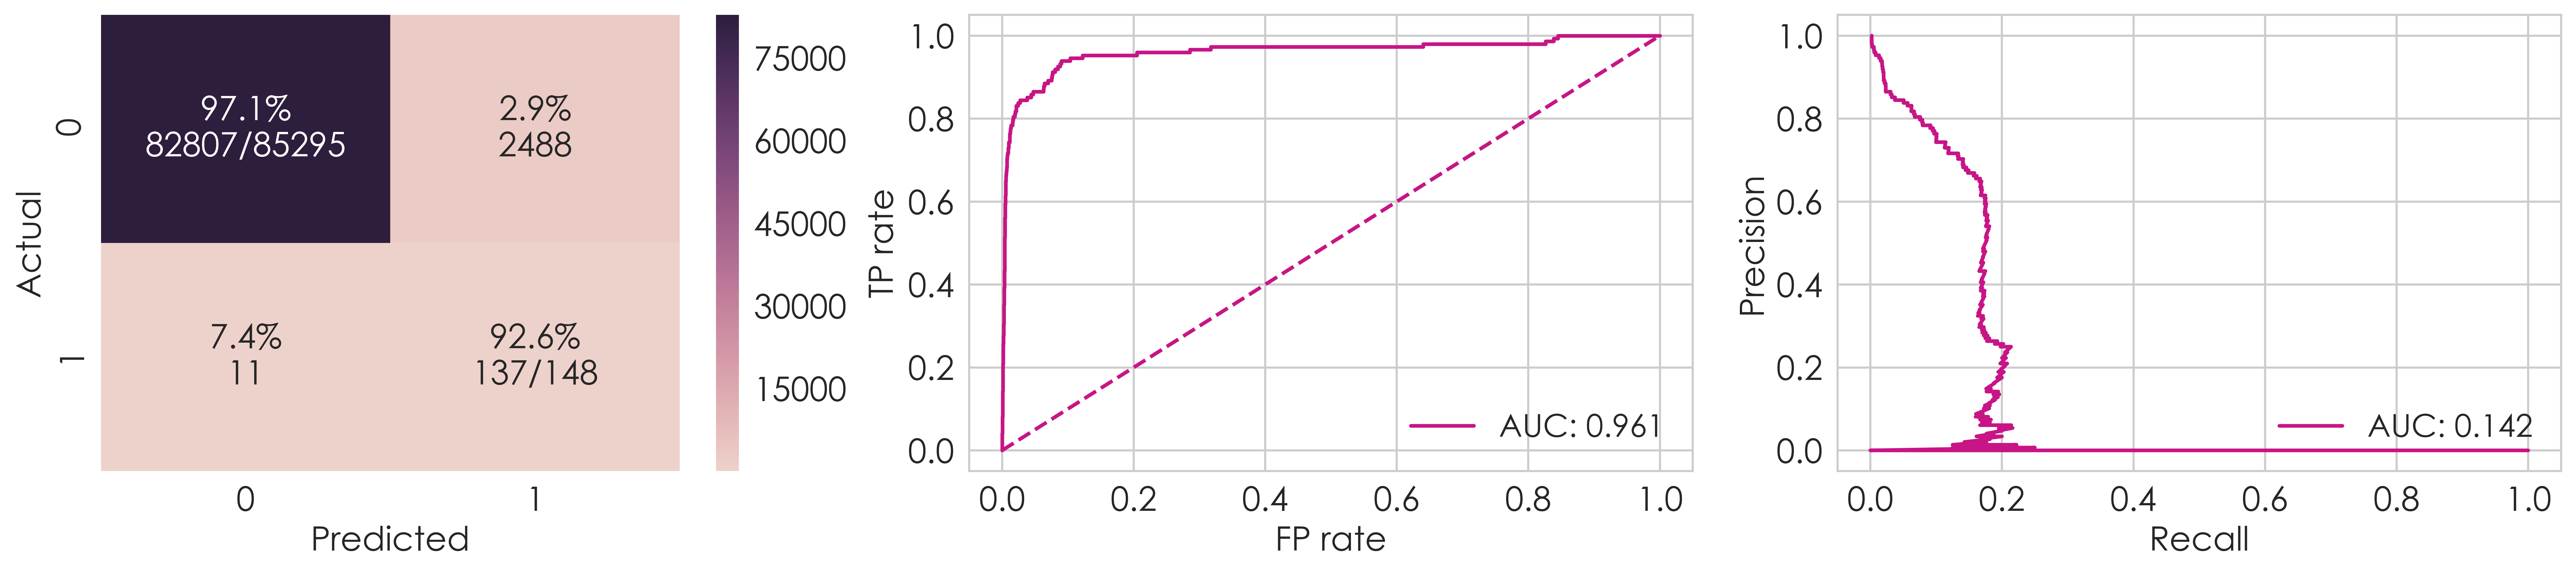

In [52]:
plot_metrics(X_new, y)

Clustering improved true positive rate, but decreased true negative a bit, as well as false positive.